In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

1. Load the auto.csv dataset again using the pandas.read function and remember to
remove the missing values in the dataset, indicated by ‘?’, and then make sure the
corresponding columns are casted to a numerical type

In [8]:
cars = pd.read_csv('auto.csv', delimiter=',')
cars = cars[cars['horsepower'] != '?']
cars['horsepower'] = cars['horsepower'].astype(int)

2. Inspect the data. Plot the relationships between the different variables and mpg. Use
for example the matplotlib.pyplot scatter plot. Do you already suspect what features
might be helpful to regress the consumption? Save the graph.

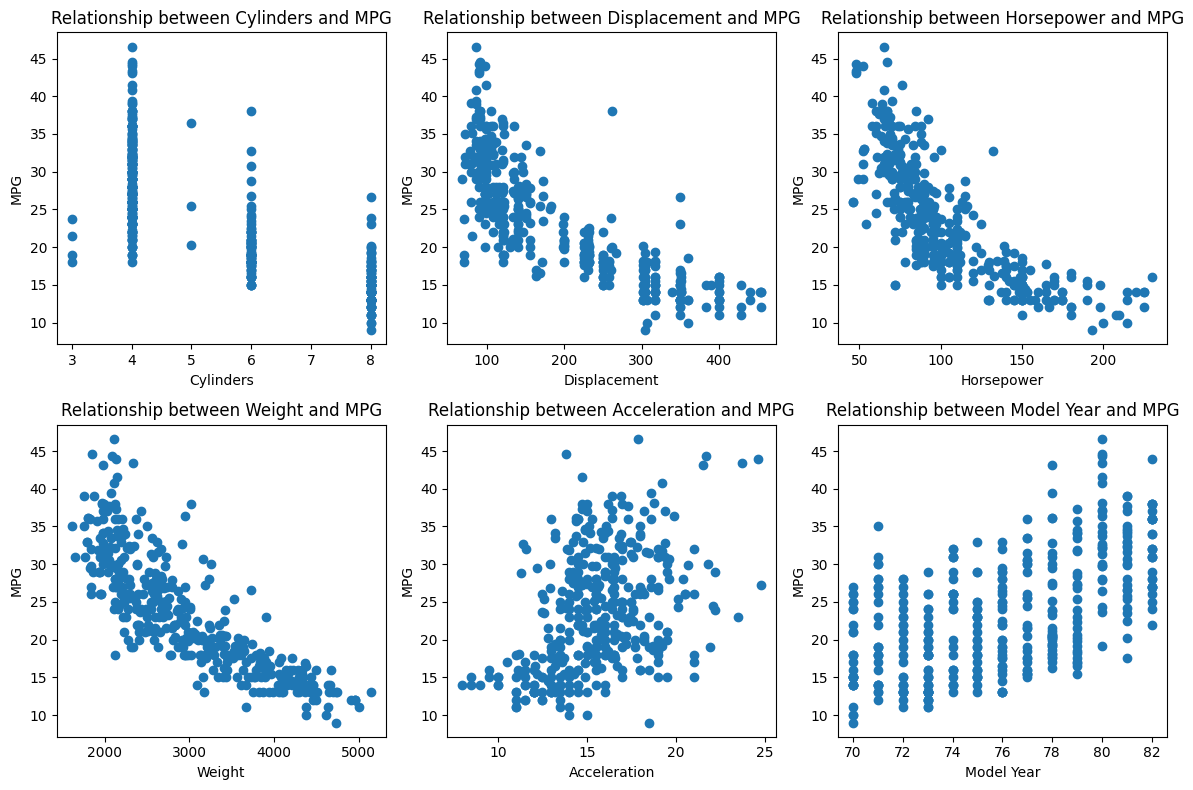

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(cars['cylinders'], cars['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Relationship between Cylinders and MPG')

plt.subplot(2, 3, 2)
plt.scatter(cars['displacement'], cars['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('Relationship between Displacement and MPG')

plt.subplot(2, 3, 3)
plt.scatter(cars['horsepower'], cars['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between Horsepower and MPG')

plt.subplot(2, 3, 4)
plt.scatter(cars['weight'], cars['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Relationship between Weight and MPG')

plt.subplot(2, 3, 5)
plt.scatter(cars['acceleration'], cars['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.title('Relationship between Acceleration and MPG')

plt.subplot(2, 3, 6)
plt.scatter(cars['model_year'], cars['mpg'])
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Relationship between Model Year and MPG')

plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

--> relevant: displacement, horsepower, weight, acceleration


3. Perform a linear regression using the OLS function from the statsmodels package.
Use 'horsepower' as feature and regress the value 'mpg'. It is a good idea to look up
the statsmodels documentation on OLS, to understand how to use it. Further, plot the
results including your regression line.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           7.03e-81
Time:                        11:40:10   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

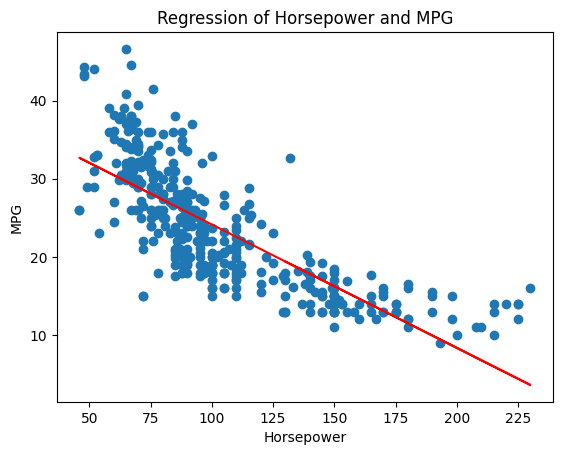

In [10]:
X = cars['horsepower']
y = cars['mpg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())
r2_firstIteration = model.rsquared

plt.scatter(cars['horsepower'], cars['mpg'])
plt.plot(cars['horsepower'], model.predict(X), color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regression of Horsepower and MPG')
plt.show()

4. Now extend the model using all features. How would you determine which features
are important and which aren't? Try to find a good selection of features for your
model

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          3.79e-135
Time:                        11:40:10   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051   

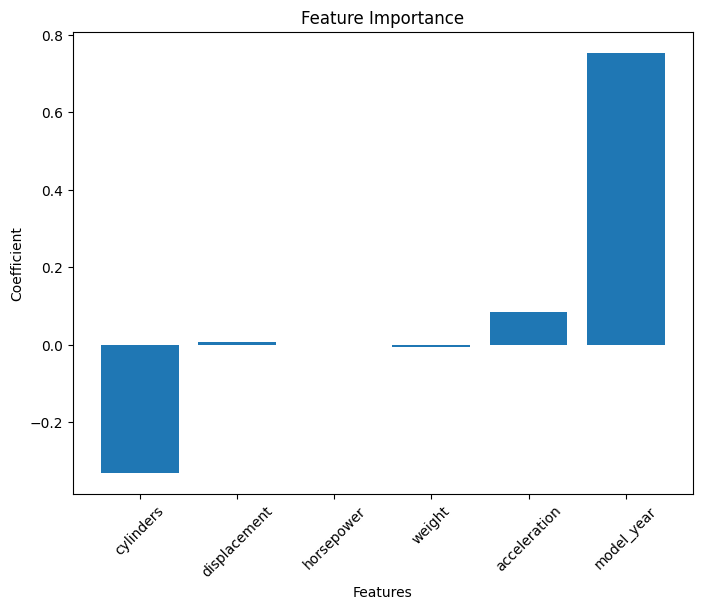

In [11]:
X = cars[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())
r2_secondIteration = model.rsquared

# Extract feature importance
feature_importance = model.params[1:]
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance.index, feature_importance.values)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

--> relevant: cylinders, model_year, acceleration

5. Can you improve your regression performance by trying different transformations of
the variables, such as log(x), sqr(x), 1/x, x^2 and so on. For each transformation, which
features are important and which aren’t?

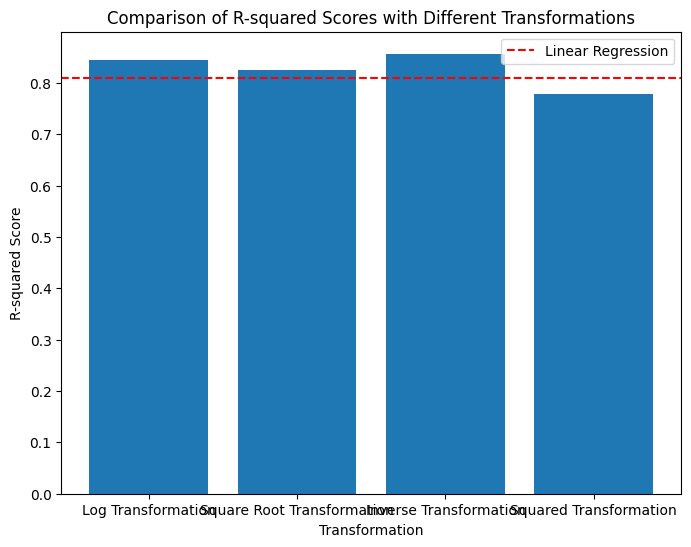

In [12]:
# Perform regression with log(x)
X_log = np.log(cars[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']])
X_log = sm.add_constant(X_log)
model_log = sm.OLS(y, X_log).fit()

# print(model_log.summary())
r2_log = model_log.rsquared

# Perform regression with sqrt(x)
X_sqrt = np.sqrt(cars[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']])
X_sqrt = sm.add_constant(X_sqrt)
model_sqrt = sm.OLS(y, X_sqrt).fit()

#print(model_sqrt.summary())
r2_sqrt = model_sqrt.rsquared

# Perform regression with 1/x
X_inv = 1 / cars[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
X_inv = sm.add_constant(X_inv)
model_inv = sm.OLS(y, X_inv).fit()

#print(model_inv.summary())
r2_inv = model_inv.rsquared

# Perform regression with x^2
X_sq = cars[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']] ** 2
X_sq = sm.add_constant(X_sq)
model_sq = sm.OLS(y, X_sq).fit()

#print(model_sq.summary())
r2_sq = model_sq.rsquared

r2_scores = [r2_log, r2_sqrt, r2_inv, r2_sq]
transformation_names = ['Log Transformation', 'Square Root Transformation', 'Inverse Transformation', 'Squared Transformation']

plt.figure(figsize=(8, 6))
plt.bar(transformation_names, r2_scores)
plt.xlabel('Transformation')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores with Different Transformations')

# Add linear regression results
plt.axhline(y=r2_secondIteration, color='red', linestyle='--', label='Linear Regression')

plt.legend()
plt.show()